# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Data

In [2]:
df = pd.read_csv("heart disease classification dataset (1).csv")
df.shape

(303, 15)

## Data Exploration (explorotory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, cahnge or remove features to get more out of your data?

In [3]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [4]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [5]:
# Let's find out how many of each class there
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

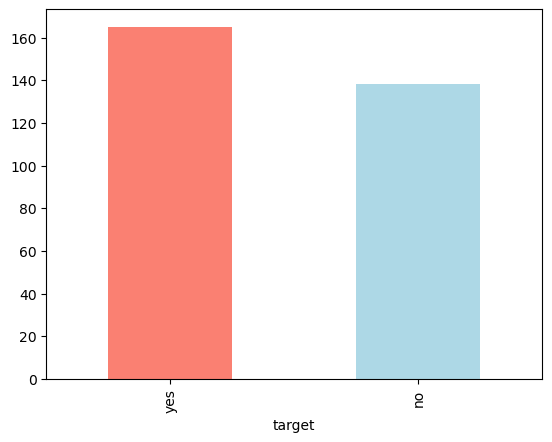

In [6]:
df['target'].value_counts().plot(kind='bar',color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [8]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Heart Disease Frequency according to Sex

In [10]:
df['sex'].value_counts()

sex
male      207
female     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,female,male
target,,
no,24,114
yes,72,93


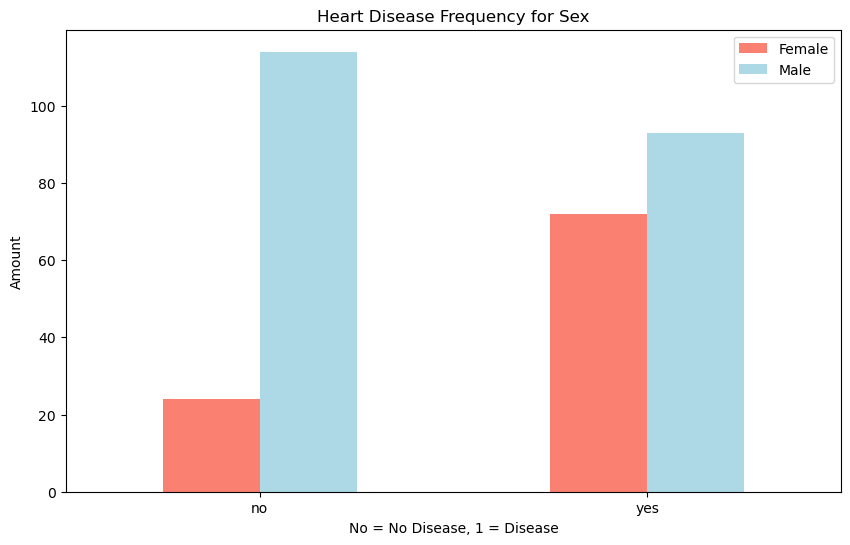

In [12]:
# Create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("No = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease 

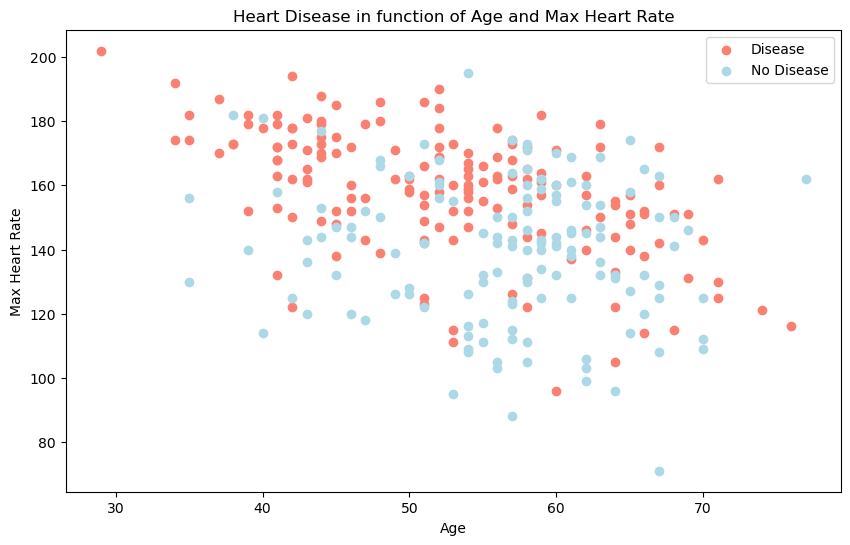

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target=='yes'],
            df.thalach[df.target=='yes'],
            c='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target=='no'],
            df.thalach[df.target=='no'],
            c='lightblue');

# Add some info
plt.title('Heart Disease in function of Age and Max Heart Rate');
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

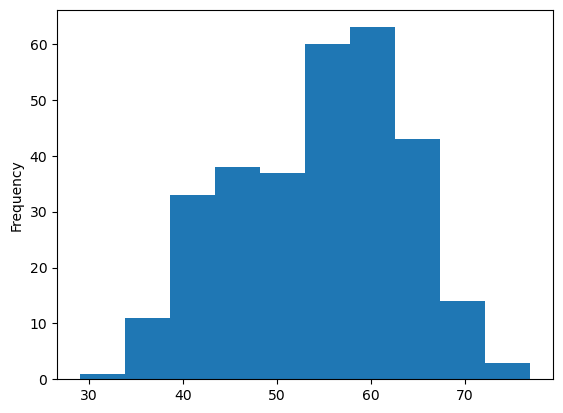

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp, df.target)

target,no,yes
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


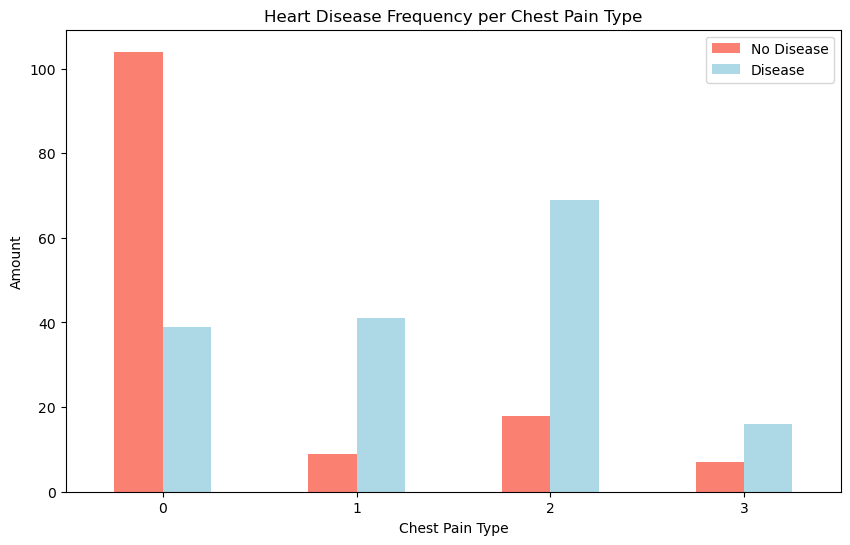

In [16]:
# Make the cross tab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])
# Add some communication
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [17]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [18]:
# Make sex and target int
df['sex'] = df['sex'].replace({'male': 0, 'female': 1}).astype(int)
df['target'] = df['target'].replace({'yes': 0, 'no': 1})

C:\Users\jayrw\AppData\Local\Temp\ipykernel_13956\2031584086.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 0, 'female': 1}).astype(int)
C:\Users\jayrw\AppData\Local\Temp\ipykernel_13956\2031584086.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'yes': 0, 'no': 1})


In [19]:
# Make a correlation matrix
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Unnamed: 0,1.000000,0.185153,-0.201132,-0.399163,0.103337,0.021627,0.000743,-0.021130,-0.393974,0.363788,0.298161,-0.276484,0.384962,0.257403,0.862585
age,0.185153,1.000000,0.098447,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,0.225439
sex,-0.201132,0.098447,1.000000,0.049353,0.064347,0.197387,-0.045032,0.058196,0.051491,-0.141664,-0.096093,0.030711,-0.118261,-0.210041,-0.280937
cp,-0.399163,-0.068653,0.049353,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,-0.433798
trestbps,0.103337,0.279570,0.064347,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,0.142035
chol,0.021627,0.213465,0.197387,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,0.086563
fbs,0.000743,0.121308,-0.045032,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,0.028046
restecg,-0.021130,-0.116211,0.058196,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,-0.137230
thalach,-0.393974,-0.396302,0.051491,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,-0.413252
exang,0.363788,0.096801,-0.141664,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,0.436757


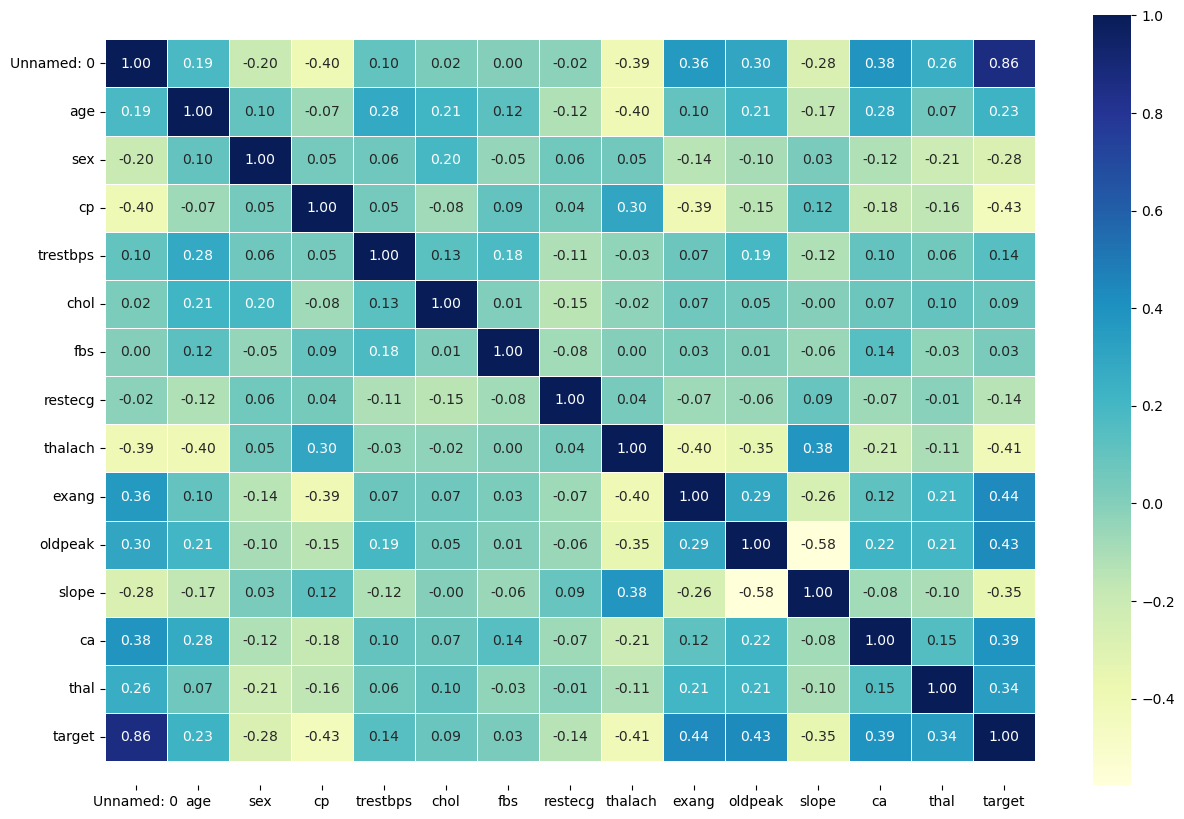

In [20]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 5. Modeling

In [21]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,0
1,1,37,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,0
2,2,41,1,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0
3,3,56,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,0
4,4,57,1,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,0


In [22]:
df = df.dropna(axis=0)

In [23]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [24]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,0
1,1,37,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,0
2,2,41,1,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0
3,3,56,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,0
5,5,57,0,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,0


In [25]:
# Split data into x and y
X = df.drop(['target', 'Unnamed: 0'], axis=1)
y = df['target']

In [26]:
# Create train, test split
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,0,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,0,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,0,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,0,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,0,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,0,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,43,1,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,64,1,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,58,1,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [28]:
y_train, len(y_train)

(217    1
 236    1
 233    1
 76     0
 27     0
       ..
 194    1
 74     0
 110    0
 278    1
 106    0
 Name: target, Length: 234, dtype: int64,
 234)

In [29]:
y_test.value_counts(), len(y_test)

(target
 0    34
 1    25
 Name: count, dtype: int64,
 59)

Now we've got our data split into training and test sets, it's time to build a machine learning model

We'll train it (find the patterns) on the training set.

And we'll test it(use the patterns) on the testing set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Sklearn machine learning models
    X_trian : training data(no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    #Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models = models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

### Model Comparison

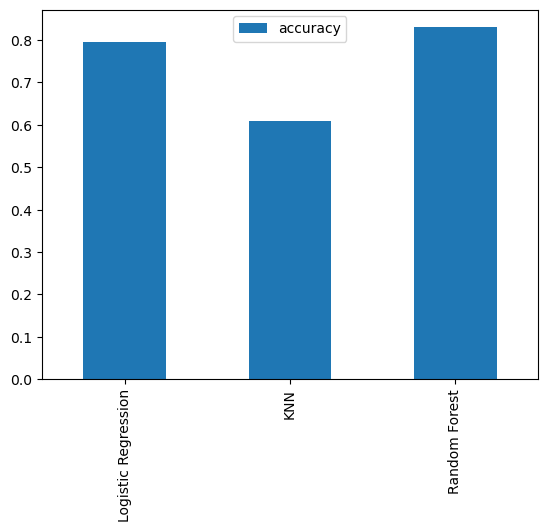

In [32]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't awlays what we should base our next steps off, what should we do?

Let's look at the follow:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [33]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setp KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.7521367521367521,
 0.7564102564102564,
 0.7478632478632479,
 0.7606837606837606,
 0.7435897435897436,
 0.7478632478632479,
 0.7264957264957265,
 0.7393162393162394,
 0.7350427350427351,
 0.7136752136752137,
 0.7094017094017094,
 0.6709401709401709,
 0.6837606837606838,
 0.6709401709401709,
 0.688034188034188,
 0.6794871794871795,
 0.6752136752136753,
 0.6709401709401709,
 0.6794871794871795]

In [35]:
test_scores

[0.6271186440677966,
 0.6271186440677966,
 0.6440677966101694,
 0.6779661016949152,
 0.6101694915254238,
 0.6440677966101694,
 0.6779661016949152,
 0.6271186440677966,
 0.6440677966101694,
 0.6440677966101694,
 0.7288135593220338,
 0.6440677966101694,
 0.6949152542372882,
 0.6779661016949152,
 0.711864406779661,
 0.6949152542372882,
 0.6949152542372882,
 0.6949152542372882,
 0.7288135593220338,
 0.7288135593220338]

Maximum KNN score on the test data: 72.88%


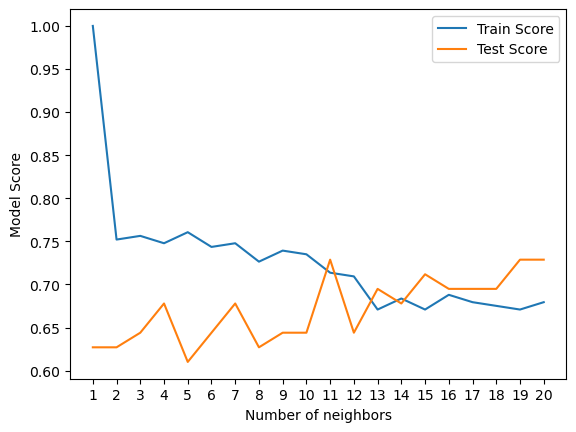

In [36]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [37]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid= {'C': np.logspace(-4, 4, 20),
              'solver':['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}   

Now we've got hyperparmeter grids setup for each of our models, let's tune them using RandomizedSearchCV.

In [38]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.08858667904100823)}

In [40]:
rs_log_reg.score(X_test, y_test)

0.7966101694915254

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier().

In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(9),
 'max_depth': 5}

In [43]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.864406779661017

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [45]:
gs_log_reg.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.7966101694915254

In [47]:
model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [48]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [50]:
y_test

87     0
268    1
47     0
182    1
148    0
129    0
234    1
122    0
10     0
94     0
152    0
283    1
35     0
289    1
228    1
80     0
48     0
6      0
238    1
251    1
128    0
245    1
287    1
105    0
78     0
279    1
282    1
113    0
63     0
208    1
44     0
59     0
293    1
121    0
62     0
170    1
290    1
117    0
164    0
66     0
151    0
69     0
277    1
163    0
187    1
32     0
24     0
26     0
285    1
123    0
253    1
82     0
19     0
178    1
220    1
183    1
189    1
173    1
7      0
Name: target, dtype: int64

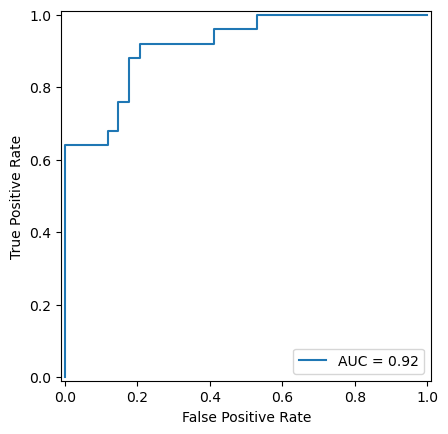

In [51]:
# Plot ROC curve and calculate AUC metric
y_scores = gs_log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)).plot();

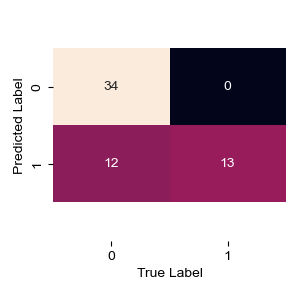

In [52]:
# Confusion Matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    sns.set(font_scale=1.5)

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)
    

Now we've got a ROC curve, an AUC matrix, and a confusion matrix, let's get a classification report as well as cross-validated precision, recall, and f1-score

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        34
           1       1.00      0.52      0.68        25

    accuracy                           0.80        59
   macro avg       0.87      0.76      0.77        59
weighted avg       0.85      0.80      0.78        59



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1 score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [54]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

In [56]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.84745763, 0.89830508, 0.88135593, 0.87931034, 0.74137931])

In [57]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8495616598480421)

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision

array([0.95      , 0.92      , 0.88461538, 0.91304348, 0.78947368])

In [59]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8914265094173561)

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring='recall')
cv_recall

array([0.7037037 , 0.85185185, 0.85185185, 0.80769231, 0.57692308])

In [61]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.7584045584045583)

In [62]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='f1')
cv_f1_score

array([0.80851064, 0.88461538, 0.86792453, 0.85714286, 0.66666667])

In [63]:
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

np.float64(0.8169720150049334)

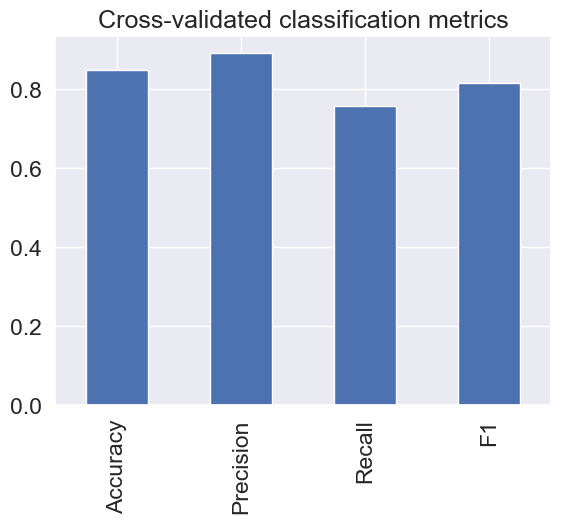

In [64]:
# Visualize cross-validated metrics
cv_metric = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1_score},
                         index=[0])
cv_metric.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. Search for feature importance for model

Let's find the feature importance for our Logistic regression Model

In [65]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [66]:
# Check coef_
clf.coef_

array([[-0.0042201 , -0.49534376, -0.60004974,  0.01386797,  0.00146896,
         0.00222716, -0.17577429, -0.02220326,  0.57374811,  0.51810144,
        -0.27105212,  0.59768873,  0.49807793]])

In [67]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Unnamed: 0': np.float64(-0.004220098812872189),
 'age': np.float64(-0.49534376336702046),
 'sex': np.float64(-0.6000497378523737),
 'cp': np.float64(0.013867969687631976),
 'trestbps': np.float64(0.001468955859362387),
 'chol': np.float64(0.002227164503541514),
 'fbs': np.float64(-0.17577429164720837),
 'restecg': np.float64(-0.022203257323703752),
 'thalach': np.float64(0.5737481088280298),
 'exang': np.float64(0.5181014426504422),
 'oldpeak': np.float64(-0.27105212233168735),
 'slope': np.float64(0.5976887274517966),
 'ca': np.float64(0.4980779308058946)}

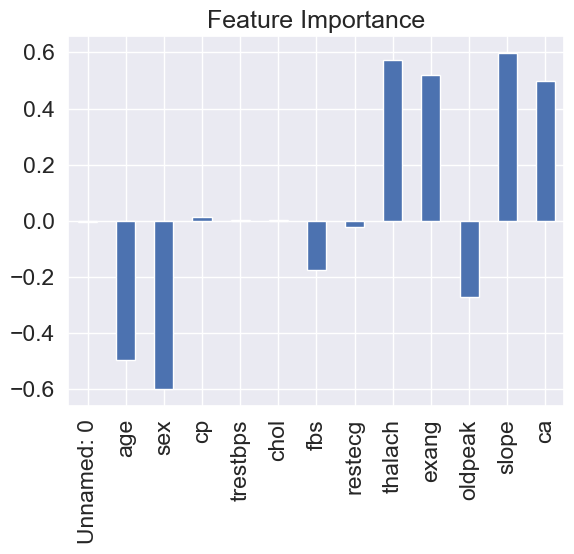

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [69]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,92,110
1,68,23


In [70]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,9,12
1,48,88
2,103,33


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?